#               MOVIE RECOMENDATION SYSTEM CONTENT BASED 

Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.Recommender systems produce a list of recommendations in any of the two ways

Collaborative filtering: Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.

Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.

In This project we are predicting the movie to the user using Content-Based filtering.
I have imported the dataset of HOLLYWOOD movies.

Importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df=pd.read_csv("movie_dataset.csv")
import matplotlib.pyplot as plt
import seaborn as sns
#df=pd.read_csv("movie_dataset.csv",usecols=['keywords','cast','genres','director'])

In [3]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


                                    Data Visualiztion

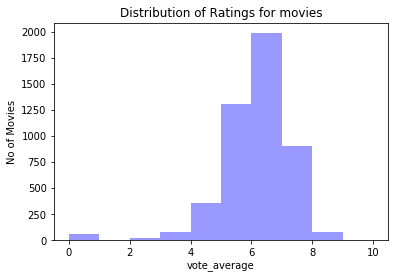

In [4]:
plt.title("Distribution of Ratings for movies")
plt.ylabel("No of Movies")
sns.distplot(df["vote_average"],kde=False,bins=10,color="blue")


We see that most of the movies are rated between 5.5 to 7.5

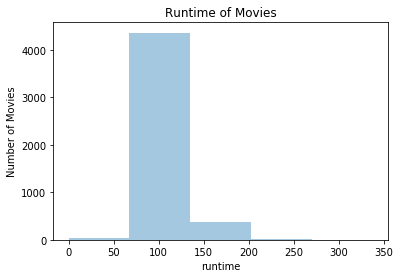

In [5]:
plt.title("Runtime of Movies")
plt.ylabel("Number of Movies")
sns.distplot(df["runtime"],bins=5,kde=False)


Most of the movies have the runtime between 80 minutes to 200 minutes

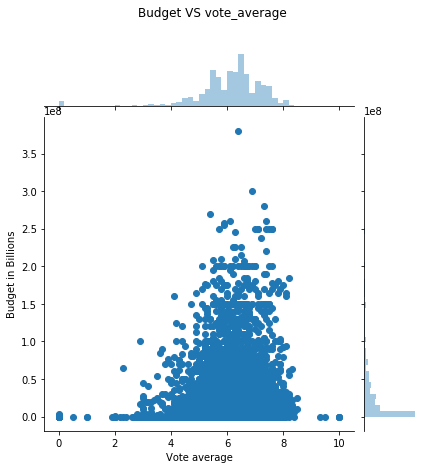

In [24]:

g=sns.jointplot(x="vote_average",y="budget",data=df)
g.fig.suptitle("Budget VS vote_average", y=1.08)
g.set_axis_labels("Vote average",
                 "Budget in Billions")

Considering the features such as keywords cast genres and director a new column of combined features is created.

In [50]:
features=['keywords','cast','genres','director']

In [51]:
def combine_features(row):# here we are doing content based recommendation so here we are combining the texts for our model.
    return row['keywords']+" "+row['cast']+" " +row['genres']+" "+row['director']

In [52]:
a=df["homepage"].isnull()
len(df[a])
df[a].head()# here some values are missing.

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
15,15,225000000,Adventure Family Fantasy,NaN,2454,based on novel fictional place brother sister ...,en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,...,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,Ben Barnes William Moseley Anna Popplewell Ska...,"[{'name': 'Liz Mullane', 'gender': 1, 'departm...",Andrew Adamson
24,24,207000000,Adventure Drama Action,NaN,254,film business screenplay show business film ma...,en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,...,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,Naomi Watts Jack Black Adrien Brody Thomas Kre...,"[{'name': 'James Newton Howard', 'gender': 2, ...",Peter Jackson
27,27,209000000,Thriller Action Adventure Science Fiction,NaN,44833,fight u.s. navy mind reading hong kong soccer,en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,...,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,Taylor Kitsch Alexander Skarsg\u00e5rd Rihanna...,"[{'name': 'Paul Rubell', 'gender': 2, 'departm...",Peter Berg
33,33,210000000,Adventure Action Science Fiction Thriller,NaN,36668,mutant marvel comic based on comic book superh...,en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,...,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,Hugh Jackman Halle Berry Ian McKellen Patrick ...,"[{'name': 'Mark Goldblatt', 'gender': 2, 'depa...",Brett Ratner
34,34,200000000,Animation Family,NaN,62211,monster dormitory games animation best friend,en,Monsters University,A look at the relationship between Mike and Su...,89.186492,...,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528,Billy Crystal John Goodman Steve Buscemi Helen...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Dan Scanlon


In [53]:
for feature in features:
    df[feature]=df[feature].fillna('')# filling the null values with ' '
print(df.columns)

df["combined_features"]=df.apply(combine_features,axis=1)# to apply the function to all columns
# so at once it takes the values of a single row.

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')


In [54]:
df.iloc[0].combined_features# here the genre and cast director keywords are being taken  and combined to create a vector.

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.



In [55]:
cv=CountVectorizer()# feeding the combined strings (movie count ) to Count vectoriser
count_matrix=cv.fit_transform(df["combined_features"])

Cosine similarity is a metric used to determine how similar two entities are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [56]:
cosine_sim=cosine_similarity(count_matrix)
print((cosine_sim))# automatically get a corelation matrix 

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [57]:
# defining to functions to helper functions to get movie titles from movie index .

In [58]:
def get_title_from_index(index):
    return df[df.index==index]["title"].values[0]
def get_indec_from_title(title):
    return df[df.title==title]["index"].values[0]


 movie_user_likes variable can be altered to get the recommendations for other movies.

In [59]:
movie_user_likes="Avatar"# This is the movie liked by the user now we have to recommend new movies similar to Avatar in this case
movie_index=get_indec_from_title(movie_user_likes)
print(list(enumerate(cosine_sim[movie_index])))# here enumerate functions give the tupple of the form (index, value)
similar_movies=list(enumerate(cosine_sim[movie_index])) 

[(0, 1.0000000000000004), (1, 0.10540925533894599), (2, 0.12038585308576921), (3, 0.03774256780481986), (4, 0.23094010767585033), (5, 0.1924500897298753), (6, 0.0), (7, 0.1405456737852613), (8, 0.08206099398622181), (9, 0.11785113019775793), (10, 0.23094010767585035), (11, 0.07698003589195011), (12, 0.12038585308576921), (13, 0.11547005383792516), (14, 0.181848241863327), (15, 0.07548513560963972), (16, 0.1382602259640567), (17, 0.12309149097933272), (18, 0.1405456737852613), (19, 0.12309149097933272), (20, 0.11785113019775793), (21, 0.07856742013183862), (22, 0.08830215713766958), (23, 0.12909944487358055), (24, 0.06804138174397717), (25, 0.08606629658238704), (26, 0.21821789023599236), (27, 0.15713484026367724), (28, 0.15713484026367724), (29, 0.12309149097933272), (30, 0.1887128390240993), (31, 0.1924500897298753), (32, 0.10910894511799618), (33, 0.14547859349066158), (34, 0.0), (35, 0.16798421022632323), (36, 0.15713484026367724), (37, 0.21516574145596762), (38, 0.11322770341445959

In [60]:
print(sorted(similar_movies,key= lambda x:x[1],reverse=True)[1:])# sim_movies are in tupple so we are sorting it based
# on 2nd data point.
sorted_similar_movies=sorted(similar_movies,key= lambda x:x[1],reverse=True)[1:]# here the 1st element will be the same movie 
# bcoz its correlated 100% so 1st element is left out whil sorting and the also while assigning to similar movies the seen
# movie must be dropped so [1:]is placed at the last. reverse implies descedning order. here key is a function

[(94, 0.42339019740572564), (2403, 0.3774256780481986), (3208, 0.3464101615137755), (47, 0.34426518632954817), (56, 0.33596842045264647), (3158, 0.33333333333333337), (2198, 0.31426968052735443), (2696, 0.30792014356780045), (4401, 0.28867513459481287), (1531, 0.2858966759567453), (278, 0.2810913475705226), (1053, 0.2809003238667948), (239, 0.2765204519281134), (838, 0.2749859704614352), (61, 0.27498597046143514), (232, 0.2694301256218254), (4332, 0.2694301256218254), (661, 0.264197974633739), (4593, 0.264197974633739), (3730, 0.2592592592592593), (1650, 0.2501595914621521), (158, 0.24618298195866545), (461, 0.24618298195866545), (1083, 0.24618298195866542), (322, 0.24077170617153845), (228, 0.24077170617153842), (539, 0.24077170617153842), (577, 0.23570226039551587), (1990, 0.23570226039551587), (1652, 0.23570226039551584), (10, 0.23094010767585035), (400, 0.23094010767585035), (4, 0.23094010767585033), (2129, 0.23094010767585033), (3184, 0.23094010767585033), (1259, 0.226804605813257

Based on the movie liked by the user the model recommends 5 similar movies to the user.

In [61]:
i=0
print("top 5 similar movies to "+movie_user_likes+ " are :\n")
for ele in sorted_similar_movies:
    
    print(get_title_from_index(ele[0]))
    i=i+1
    if i>5:
        break
    

top 5 similar movies to Avatar are :

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
